# Importing Required Libraries

In [18]:
import pandas as pd
import numpy as np

# for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing image
from PIL import Image

# For model building
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# For confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Machine Learning
**Total three types of Machine learning are as follow:**
1. **Supervised Machine Learning**
   - `Regression Analysis Learning`
     - `Linear Regression`
       - Simple Linear Regression
       - Multti Linear Regression
       - Lesso Regression
       - Ridge Regression
     - `Non Linear Regression`
       - Polynomial Regression
       - Decision Tree Regression
       - Random Fores Regression
       - Support vector
       - K - Nearest Neighbour
   - `Classification Learning`
3. **Unsupervised Machine Learning**
4. **Reinforcement Learning**

## Supervised Machine Learning
### Regression Analysis Learning
#### Simple Linear Regression

(np.float64(-0.5), np.float64(2975.5), np.float64(1125.5), np.float64(-0.5))

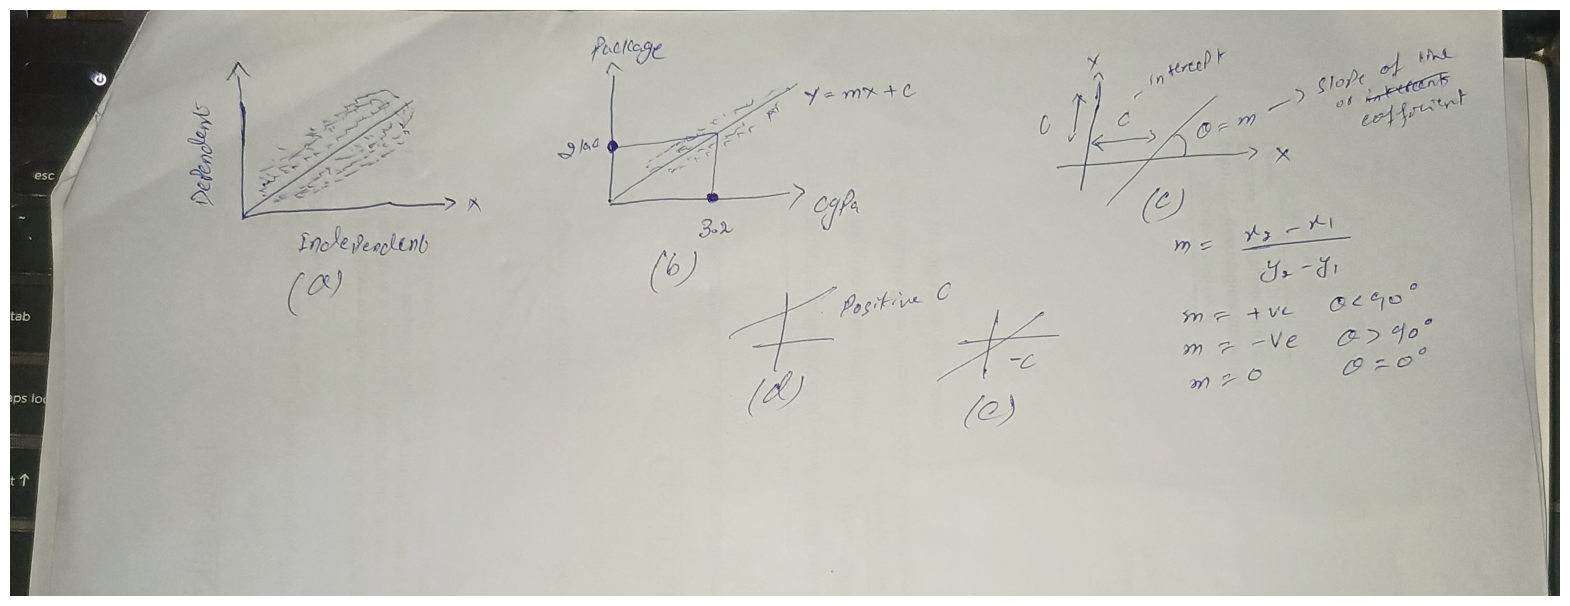

In [116]:
img = Image.open(r"G:\My Drive\Computer\1764328367572.jpg")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis("off")

In [111]:
dataset = pd.read_csv('E:\\cgpa.csv')
dataset.head()

cgpa  package
0  2.75    13.07
1  3.90    19.73
2  3.46    17.59
3  3.20    15.29
4  2.31    13.42

In [112]:
# converting data 
dataset.rename(columns = {'package': 'salary'}, inplace = True)
dataset['salary'] = dataset['salary']*5000
dataset.head()

cgpa   salary
0  2.75  65350.0
1  3.90  98650.0
2  3.46  87950.0
3  3.20  76450.0
4  2.31  67100.0

In [119]:
dataset.isnull().sum()

cgpa      0
salary    0
dtype: int64

In [120]:
x = dataset[['cgpa']]
y = dataset['salary']
x.ndim

2

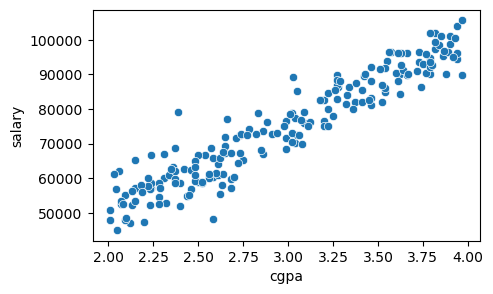

In [122]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='cgpa', y='salary', data=dataset)
plt.show()

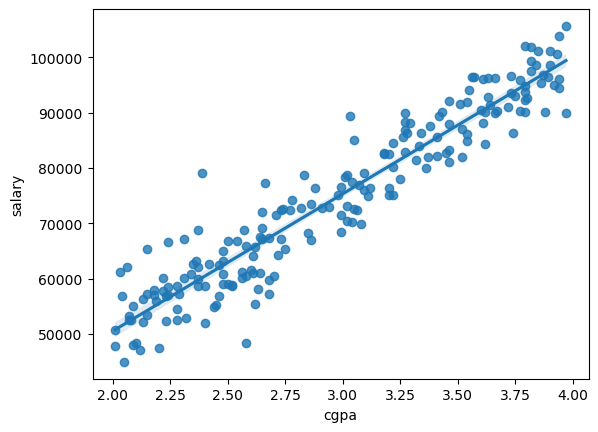

In [113]:
# Checking for nature whether its linear or non
# when we have single independent variable we use simple linear regression
sns.regplot(x='cgpa', y='salary', data=dataset)
plt.show()

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [124]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [128]:
lr.predict([[3.20]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80386.26476138])

In [125]:
dataset.head()

cgpa   salary
0  2.75  65350.0
1  3.90  98650.0
2  3.46  87950.0
3  3.20  76450.0
4  2.31  67100.0

In [129]:
lr.score(x_test, y_test)*100

87.00262792989442

In [130]:
# since y = mx + c

In [131]:
lr.coef_

array([25257.52209718])

In [132]:
lr.intercept_

np.float64(-437.80594961157476)

In [133]:
25257.52209718 * 3.20 -437.80594961157476

80386.26476136444

In [134]:
lr.predict([[3.20]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80386.26476138])

In [135]:
pred_line = lr.predict(x)

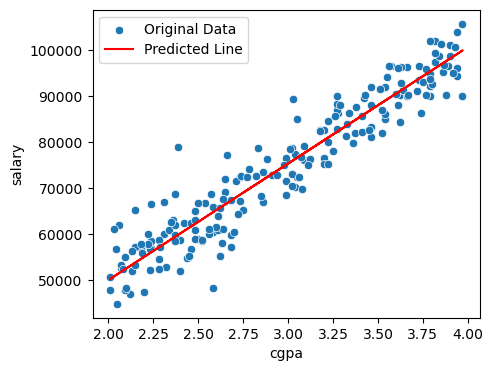

In [138]:
plt.figure(figsize = (5, 4))
sns.scatterplot(x='cgpa', y='salary', data = dataset)
plt.plot(dataset['cgpa'], pred_line, color='red')
plt.legend(['Original Data', 'Predicted Line'])
plt.savefig('Simple Linear Regression.jpg')
plt.show()

#### Multiple Linear Regression
**Y = m1n1 + m2n2 + m3n3 + ....... mn + c** <br>
Need to check first wheather its linear or not like check linearity for x1 with y then x2 with y and upto soo on if its linear than apply multiple linear regression x increase y also increase

In [140]:
dataset = pd.read_csv('E:\\experience.csv')
dataset.head()

age  experience    salary
0   58        37.0  78974.33
1   48        28.3  64824.99
2   34        16.3  46322.36
3   27         7.5  33135.04
4   40        17.3  45913.26

In [141]:
dataset.shape

(200, 3)

In [142]:
dataset.isnull().sum()

age           0
experience    0
salary        0
dtype: int64

> Now we need to check if it need the scalling like to first two variables since they are almost identical so don't need any scalling

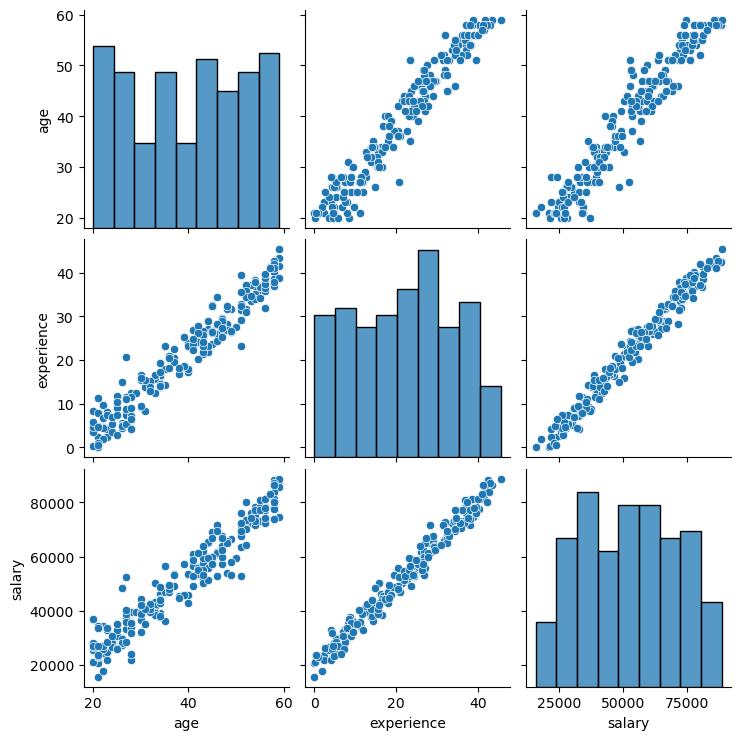

In [143]:
sns.pairplot(data=dataset)
plt.show()

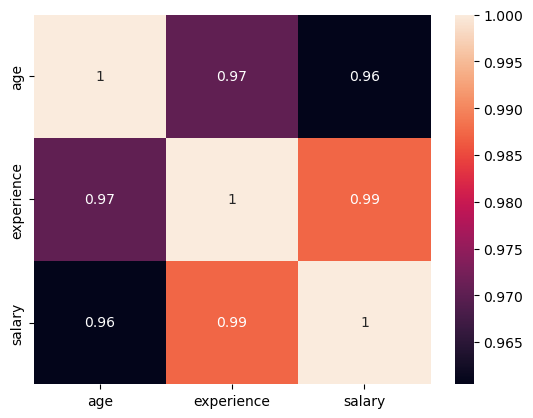

In [145]:
sns.heatmap(data = dataset.corr(), annot = True) #getting numbers of corr
plt.show()

In [153]:
x = dataset.iloc[:, :-1]
y = dataset['salary']
x.head(3)

age  experience
0   58        37.0
1   48        28.3
2   34        16.3

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [155]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [158]:
dataset.head()

age  experience    salary
0   58        37.0  78974.33
1   48        28.3  64824.99
2   34        16.3  46322.36
3   27         7.5  33135.04
4   40        17.3  45913.26

In [159]:
lr.predict([[40,17.3]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45838.48927264])

In [157]:
lr.score(x_test, y_test)*100

97.56974450704814

In [160]:
lr.coef_

array([  43.40714315, 1477.79927527])

In [161]:
lr.intercept_

np.float64(18536.27608445777)

In [162]:
Y = 43.40714315 * 40 + 1477.79927527 * 17.3 + 18536.27608445777
Y

45838.48927262877

In [167]:
pred_line = lr.predict(x)

#### Polynomial Regression
In simple linear regression or multiple linear regression graphs follows a straight line and always the linear but in polynomial regression graph doesnt follow the linearity and comes randomly

(np.float64(-0.5), np.float64(2975.5), np.float64(1460.5), np.float64(-0.5))

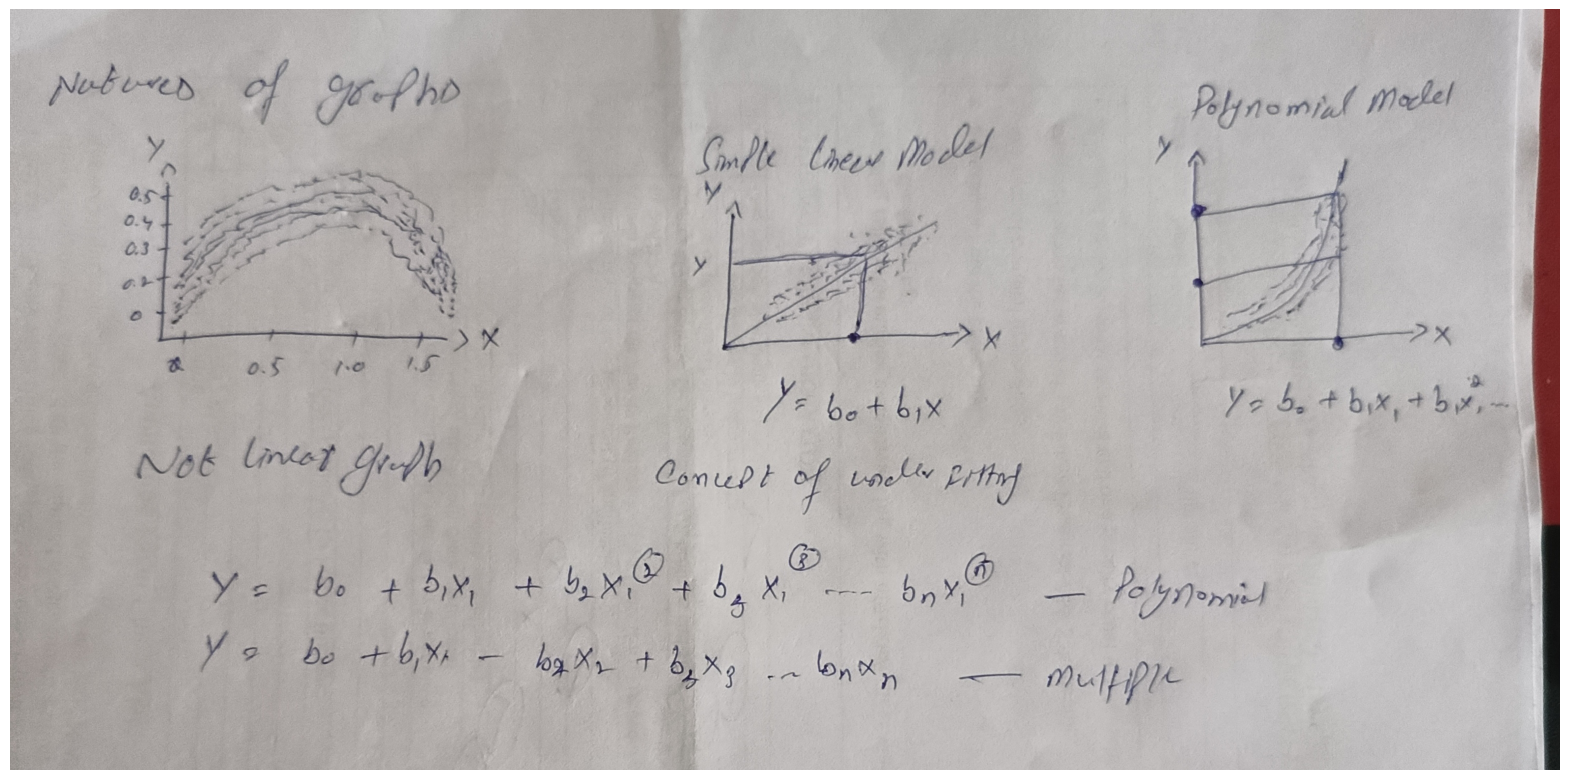

In [117]:
img = Image.open(r"G:\My Drive\Computer\1764321881100.jpg")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis("off")

In [78]:
dataset = pd.read_csv("E:\\salary.csv")
dataset.head(5)

# office data level increase salary increase

Level        Salary
0      1   9003.570765
1      2   7388.678494
2      3  12918.442691
3      4  18935.149282
4      5  11829.233126

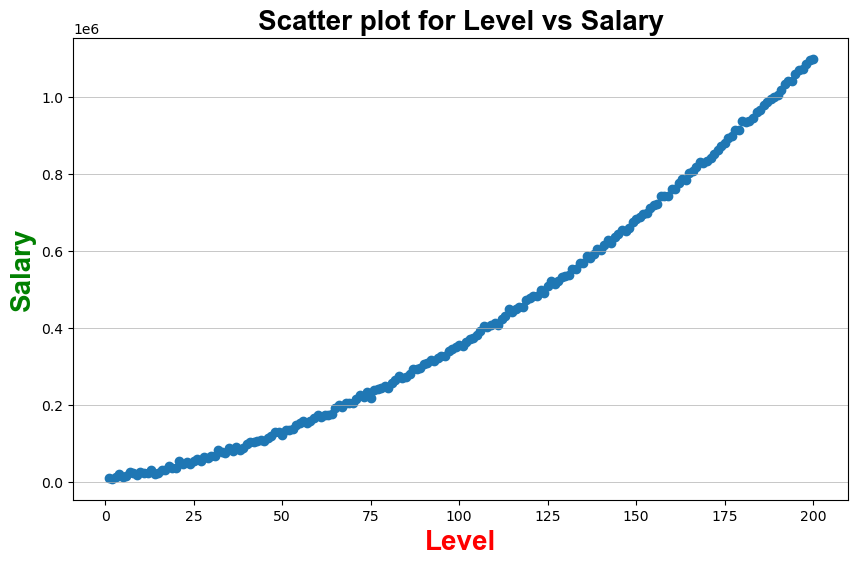

In [79]:
plt.figure(figsize = (10, 6))
plt.scatter(dataset['Level'], dataset['Salary'])


plt.grid(axis = 'y', 
        linewidth = 0.5)
plt.title('Scatter plot for Level vs Salary',
         fontsize = 20,
         color = 'black',
         fontweight = 'bold',
         fontfamily = 'Arial')
plt.xlabel('Level', 
           fontsize = 20, 
           color='red',
           fontweight = 'bold',
           fontfamily = 'Arial')          
plt.ylabel('Salary',
          fontsize = 20,
          color = 'green',
          fontweight = 'bold',
          fontfamily = 'Arial')


plt.show()

In [80]:
dataset.corr()
# salary vs Level
# Level vs salary 

Level    Salary
Level   1.000000  0.982937
Salary  0.982937  1.000000

In [81]:
# Split Data dependent and independent variables
x = dataset[['Level']] #2D
y = dataset['Salary']

In [82]:
# since data is not linear so need to convert it into polynomial
pf = PolynomialFeatures(degree = 2)
pf.fit(x)
x = pf.transform(x)

# degree two data converted
# pf.transform([[32]])
# array([[  1.,  23., 529.]])

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [85]:
lr.score(x_test, y_test)*100

99.97706019507457

In [86]:
lr.coef_

array([   0.        , 1501.0682655 ,   20.01576519])

In [87]:
lr.intercept_

np.float64(4364.621620698774)

In [88]:
# this is how we will deploy our final project to give someone
test = pf.transform([[46r]])
test

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 4.600e+01, 2.116e+03]])

**Polynomial Equation** <br>
> Y = b0 + b1x1 + b2x1^2 + b3x1^3 + ..... bnx1^n

But we will take binomial line by setting the degree = 2

In [89]:
lr.predict(test)

array([115767.12098033])

In [90]:
dataset.iloc[[46]]

Level         Salary
46     47  117376.806145

In [91]:
pred_values = lr.predict(x)

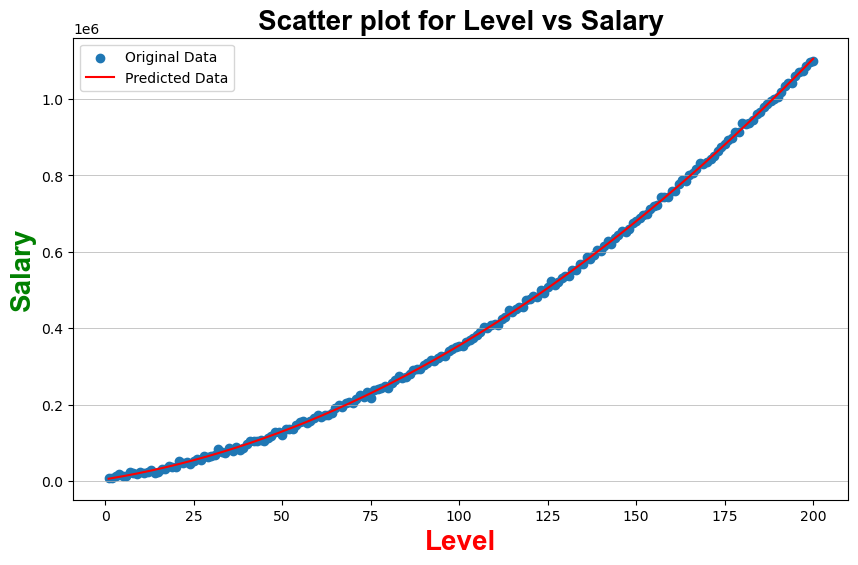

In [92]:
plt.figure(figsize = (10, 6))
plt.scatter(dataset['Level'], dataset['Salary'])
plt.plot(dataset['Level'], pred_values, color='red')
plt.legend(['Original Data', 'Predicted Data'])

plt.grid(axis = 'y', 
        linewidth = 0.5)
plt.title('Scatter plot for Level vs Salary',
         fontsize = 20,
         color = 'black',
         fontweight = 'bold',
         fontfamily = 'Arial')
plt.xlabel('Level', 
           fontsize = 20, 
           color='red',
           fontweight = 'bold',
           fontfamily = 'Arial')          
plt.ylabel('Salary',
          fontsize = 20,
          color = 'green',
          fontweight = 'bold',
          fontfamily = 'Arial')


plt.show()

### Classification Learning
#### Multiclass Classification
Multiclass classification converted into binory class 0 1 0 1 label encoded using OVR method in sklearn

In [3]:
dataset = pd.read_csv(r"E:\IRIS.csv")
dataset.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

(np.float64(-0.5), np.float64(999.5), np.float64(446.5), np.float64(-0.5))

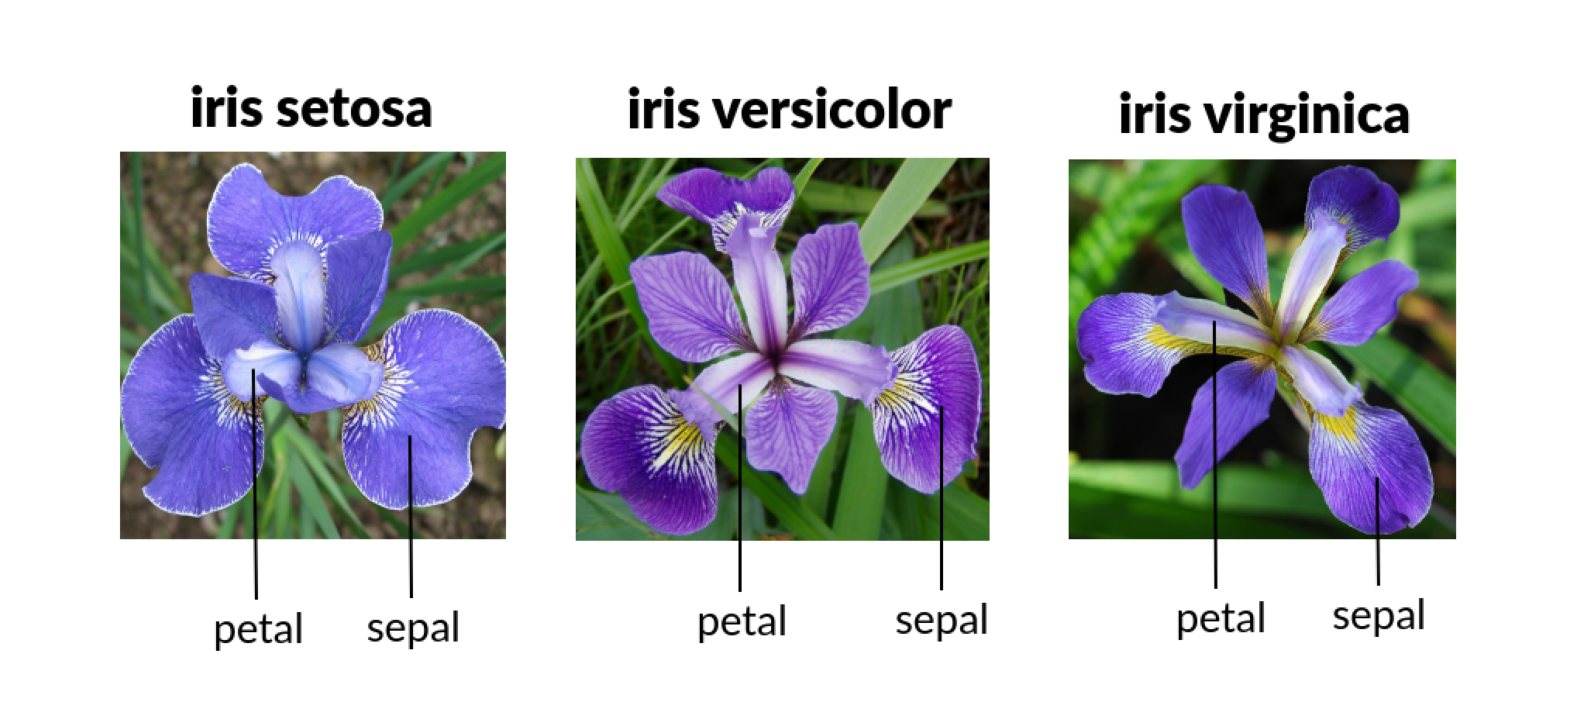

In [5]:
img = Image.open(r"E:\51518iris img1.png")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis("off")

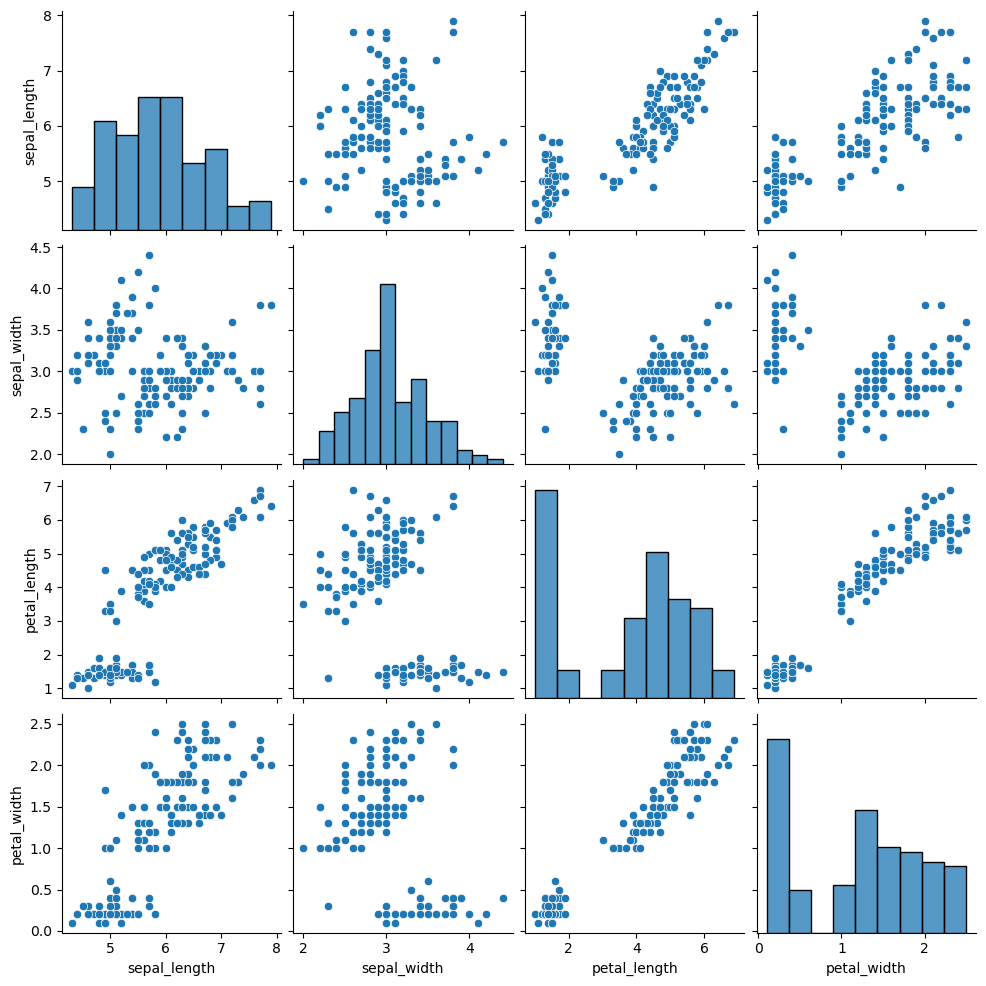

In [6]:
sns.pairplot(data=dataset)
plt.show()

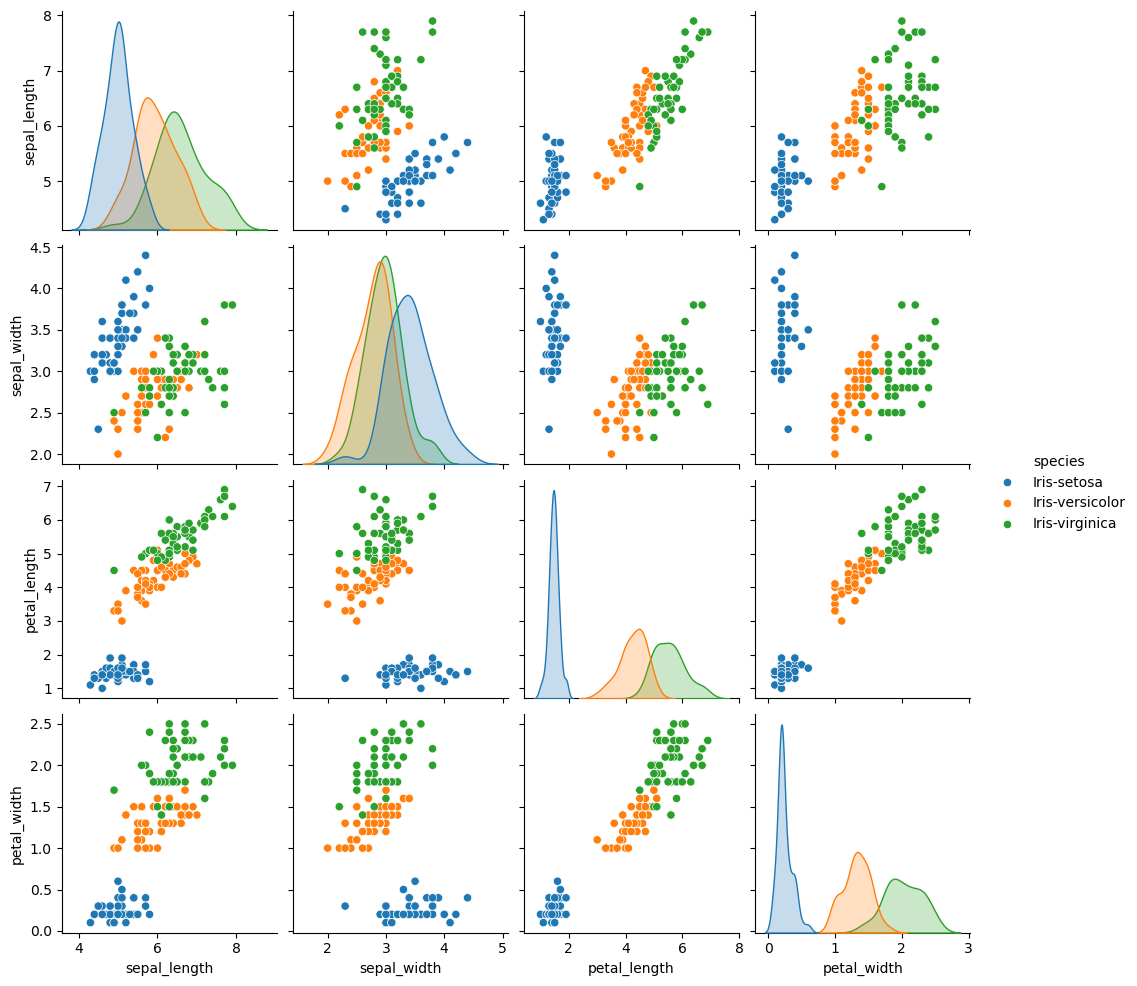

In [7]:
sns.pairplot(data=dataset, hue='species')
plt.show()

#### OVR Method

In [8]:
x = dataset.iloc[:, :-1]
y = dataset['species']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

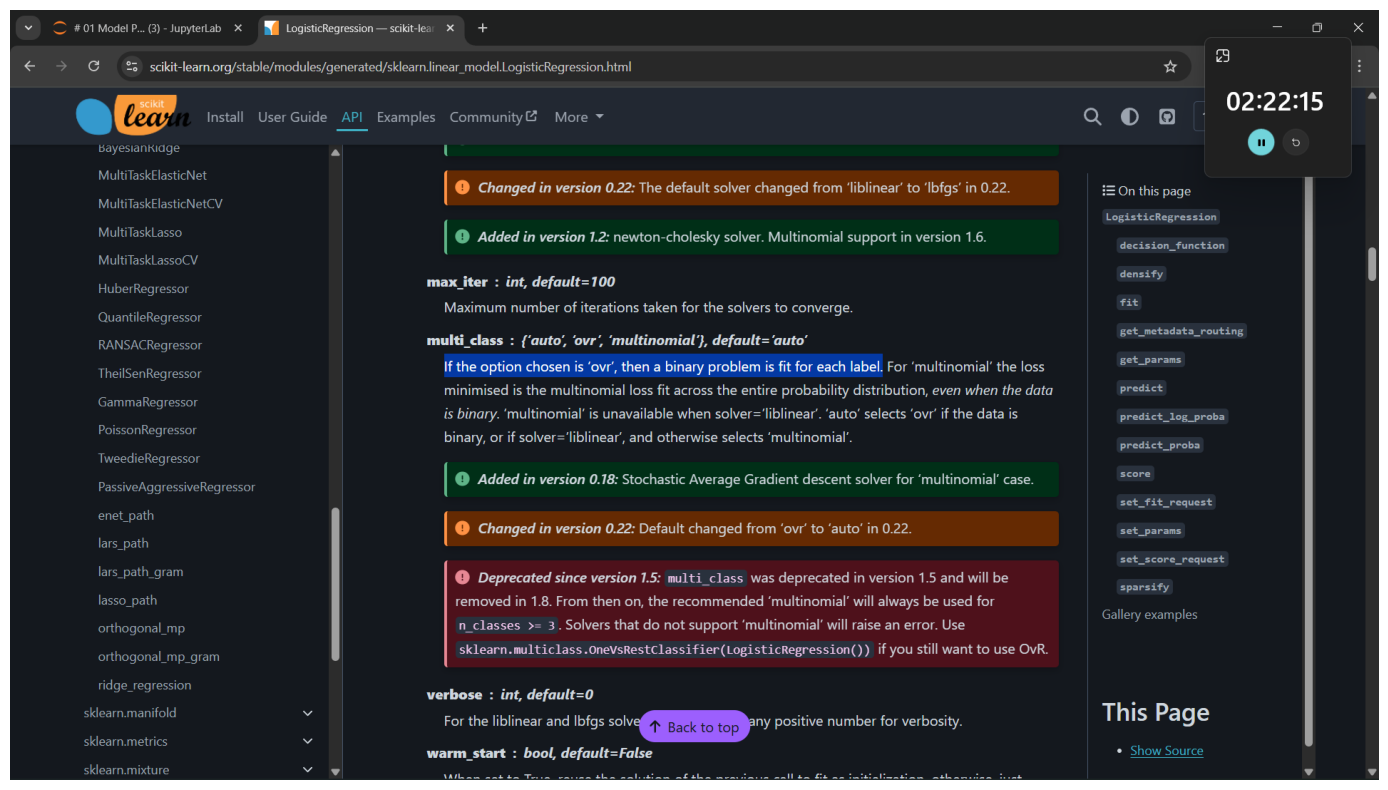

In [11]:
img = Image.open(r"C:\Users\awais\OneDrive\Pictures\Screenshots\Screenshot (88).png")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis("off")

In [12]:
Lr = LogisticRegression(multi_class='ovr')
Lr.fit(x_train, y_train)

E:\Anaconda Installed\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [13]:
Lr.score(x_test, y_test)*100

96.66666666666667

#### Multinomial

In [14]:
Lr1 = LogisticRegression(multi_class='multinomial')
Lr1.fit(x_train, y_train)

E:\Anaconda Installed\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [16]:
Lr1.score(x_test, y_test)*100

100.0

In [17]:
dataset = pd.read_csv(r"E:\\cancer_detection_symptoms.csv")
dataset.head()

Symptom1          Symptom2  Cancer
0      Fatigue  Loss of Appetite       1
1  Weight Loss             Fever       1
2         Pain            Nausea       0
3         Lump           Fatigue       1
4        Cough       Weight Loss       0

## Confusion Matrix

In [24]:
confusion_matrix(y_test, Lr.predict(x_test))

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])